#datasets for gena lm

In [1]:
def intersect(data1, data2):
  data = pd.concat([data1, data2])
  names = []
  starts = []
  ends = []
  for row in data.iterrows():
    names.append(row[1][3])
    starts.append(row[1][1])
    ends.append(row[1][2])
    intersections = []
  for i in range(1, len(names)):
    if ends[i-1]>starts[i]:
      intersections.append(choice([names[i-1], names[i]]))
  return intersections

## Imports

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pybedtools
!pip install fuc
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 75.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 36.7 MB/s eta 0:00:00
  Created wheel for pybedtools: filename=pybedtools-0.11.0-cp311-cp311-linux_x86_64.whl size=14028666 sha256=12c2114b8d3181b605ebd36e3c69554691352475ed5fc4d83f7a95ae384f5586
  Stored in directory: /root/.cache/pip/wheels/29/a9/64/b72ced6183351e9fb889c0fc86eda39fab286a4b8838443314
Successfully built pybedtools
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 102.1 MB/s eta 0:00:00


In [4]:
from random import choice
import random
import pandas as pd
import pybedtools as bedtools
import os
import Bio
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [5]:
from transformers import AutoTokenizer, BigBirdForSequenceClassification, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained('AIRI-Institute/gena-lm-bigbird-base-t2t')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/46.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.48M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [6]:
chrom_lengths = {'chr1':249250621, 'chr2':243199373, 'chr3':198022430, 'chr4':191154276,
                 'chr5':180915260, 'chr6':171115067, 'chr7':159138663, 'chr8':146364022,
                 'chr9':	141213431, 'chr10':135534747, 'chr11':135006516, 'chr12':133851895,
                 'chr13':115169878, 'chr14': 	107349540, 'chr15':	102531392, 'chr16':	90354753,
                 'chr17':	81195210, 'chr18':78077248, 'chr19':59128983, 'chr20':63025520,
                 'chr21':48129895, 'chr22':	51304566, 'chrX':155270560, 'chrY':	59373566}

## MM1S

### SE

14.07.2023 14:12 Msk the data for MM1S was downloaded from SEdb (2023-07-14* files) и из dbSuper (MM1S.bed)

Datasets intersection:

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/neural_networks/data/MM1S/2023-07-14_11_12_26_se_result.bed', sep='\t', comment='t', header=None)
header = ['chrom', 'chromStart', 'chromEnd', 'name']
data.columns = header

In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/neural_networks/data/MM1S/MM1S.bed', sep = '\t')

In [ ]:
header2 = ['chrom', 'chromStart', 'chromEnd', 'name', 'score']
data2.columns = header2
del data2['score']

In [ ]:
data = pd.concat([data, data2])
data = data.sort_values(by = ['chrom', 'chromStart'])
names = []
starts = []
ends = []

for row in data.iterrows():
      names.append(row[1][3])
      starts.append(row[1][1])
      ends.append(row[1][2])


In [ ]:
intersections = []
for i in range(1, 1557):
      if ends[i-1]>starts[i]:
        intersections.append(choice([names[i-1], names[i]]))

intersected_data = data[data['name'].isin(intersections)]
data = pd.concat([data, intersected_data]).drop_duplicates(keep=False)

Sorting by length

In [ ]:
data['length'] = data['chromEnd'] - data['chromStart']

In [ ]:
data = data[data['length']>=2500]

In [ ]:
for i in chrom_lengths.keys():
  strange_data = data[data['chrom']==i]
  strange_data = strange_data[strange_data['chromEnd']>chrom_lengths[i]]
  data = pd.concat([data, strange_data]).drop_duplicates(keep=False)

In [ ]:
data = data[data['chrom'].isin(chrom_lengths.keys())]

In [ ]:
data['chromStart'] = data['chromStart'].astype(int)
data['chromEnd'] = data['chromEnd'].astype(int)

Saving the data

In [ ]:
bed_data = bedtools.BedTool.from_dataframe(data)

In [ ]:
bed_data.saveas('/content/drive/MyDrive/neural_networks/data/MM1S/SE_data.bed')

We use bed2fasta https://meme-suite.org/meme/tools/bed2fasta to extract sequences using the coordinates in bed files

### TE

Downloaded data from EnhancerAtlas 2.0 14.07.2023 14:20 for MM1S

In [ ]:
TE_data = pd.read_csv('/content/drive/MyDrive/neural_networks/data/MM1S/MM1S.enhancers.bed', sep = '\t', header = None)

In [ ]:
TE_data

,0,1,2,3,4,5,6,7,8,9,10
0,chr1,779222,779432,EH38E2776541,0,.,779222,779432,"255,167,0",pELS,All-data/Full-classification
1,chr1,943991,944207,EH38E2776683,0,.,943991,944207,"255,205,0",dELS,All-data/Full-classification
2,chr1,944391,944733,EH38E1310285,0,.,944391,944733,"255,205,0",dELS,All-data/Full-classification
3,chr1,966648,966798,EH38E1310308,0,.,966648,966798,"255,167,0",pELS,All-data/Full-classification
4,chr1,966827,967177,EH38E2776722,0,.,966827,967177,"255,167,0",pELS,All-data/Full-classification
...,...,...,...,...,...,...,...,...,...,...,...
61609,chrX,155216708,155217019,EH38E3949941,0,.,155216708,155217019,"255,167,0","pELS,CTCF-bound",All-data/Full-classification
61610,chrX,155231220,155231552,EH38E2774625,0,.,155231220,155231552,"255,205,0",dELS,All-data/Full-classification
61611,chrX,155334642,155334992,EH38E2774647,0,.,155334642,155334992,"255,167,0",pELS,All-data/Full-classification
61612,chrX,155847098,155847361,EH38E2774702,0,.,155847098,155847361,"255,205,0",dELS,All-data/Full-classification


In [ ]:
TE_data['length'] = TE_data[2]-TE_data[1]

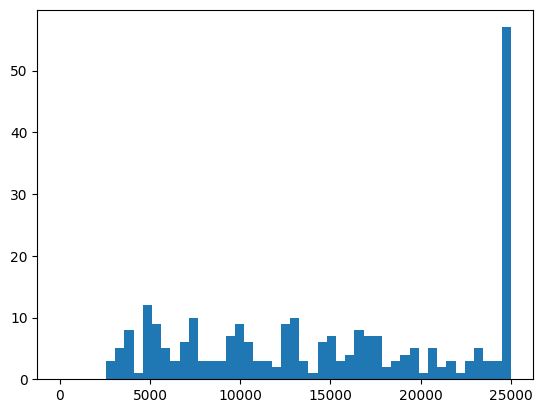

In [ ]:
SE_len = []
for i in data['length']:
  if i>25000:
    SE_len.append(25000)
  else:
    SE_len.append(i)
SE_len = np.array(SE_len)

bins = np.linspace(0, 25000, 50)
plt.hist(SE_len, bins)
plt.show()

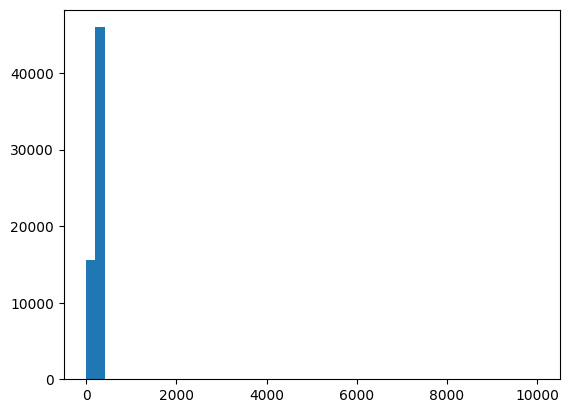

In [ ]:
TE_len = []
for i in TE_data['length']:
  TE_len.append(i)
TE_len = np.array(TE_len)

bins = np.linspace(0, 10000, 50)
plt.hist(TE_len, bins)
plt.show()

In [ ]:
n = 0
for i in SE_len:
  n+=1

In [ ]:
n

61614

In [ ]:
n = 0
for i in TE_len:
  n+=1

In [ ]:
fl = []
for i in data['length']:
  if i > 25000:
    fl.append(25000)
  else:
    fl.append(i)
data['fixed_length'] = fl

In [ ]:
TE_data = TE_data.sort_values(by = 'length')

In [ ]:
TE_data_copy = TE_data.copy()
starts=[]
ends = []
n_l = []
chroms = []
for i in range(int(min(data.length)), 25050, 50):
  ndata = data[data.fixed_length > i-50]
  ndata = ndata[ndata.fixed_length <= i]
  bin = ndata.shape[0]
  TE_bin = int(bin*(61614/263))
  TEs = TE_data_copy[0:TE_bin]
  TE_data_copy = TE_data_copy[TE_bin:]
  for index, row in TEs.iterrows():
    len = row['length']
    new_len = random.randint(i-50, i)
    n_l.append(new_len)
    delta = new_len - len
    new_start = random.randint(row[2]-delta, row[2])
    new_end = new_start + new_len
    starts.append(new_start)
    ends.append(new_end)
    chroms.append(row[0])

In [ ]:
TEs = {'chrom':chroms, 'chromStart':starts, 'chromEnd':ends, 'length':n_l}
TE_data = pd.DataFrame.from_dict(TEs)

In [ ]:
TE_data = TE_data.sample(frac=1)

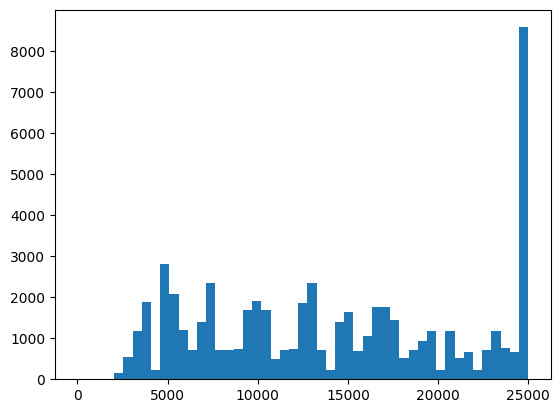

In [ ]:
TE_len = []
for i in TE_data['length']:
  TE_len.append(i)
TE_len = np.array(TE_len)

bins = np.linspace(0, 25000, 50)
plt.hist(TE_len, bins)
plt.show()

In [ ]:
data = TE_data.sort_values(by = ['chrom', 'chromStart'])

data['name'] = data['chromStart']
names = []
starts = []
ends = []
for row in data.iterrows():
  names.append(row[1][1])
  starts.append(row[1][1])
  ends.append(row[1][2])

intersections = []
for i in range(1, data.shape[0]):
  if ends[i-1]>starts[i]:
    intersections.append(choice([names[i-1], names[i]]))

intersected_data = data[data['name'].isin(intersections)]
data = pd.concat([data, intersected_data]).drop_duplicates(keep=False)

In [ ]:
for i in chrom_lengths.keys():
  strange_data = data[data['chrom']==i]
  strange_data = strange_data[strange_data['chromEnd']>chrom_lengths[i]]
  data = pd.concat([data, strange_data]).drop_duplicates(keep=False)

In [ ]:
data = data[data['chrom'].isin(chrom_lengths.keys())]

In [ ]:
bed_data = bedtools.BedTool.from_dataframe(data)

In [ ]:
bed_data.saveas('/content/drive/MyDrive/neural_networks/data/TE_data.bed')

<BedTool(/content/drive/MyDrive/neural_networks/data/TE_data.bed)>

### Creating a dataset for GENA-LM

In [ ]:
path = '/content/drive/MyDrive/neural_networks/data/MM1S/SE_data.fasta'

count = 0
sequences = [] # Here we are setting up an array to save our sequences for the next step
for seq_record in SeqIO.parse(path, "fasta"):
    sequences.append(seq_record.seq.upper())
    count = count + 1
positive_seqs = []
for sequence in sequences:
  if 'N' not in sequence:
    if len(sequence) > 25000:
      positive_seqs.append(str(sequence[:25000]))
    else:
      positive_seqs.append(str(sequence))
print(count)

872


In [ ]:
path = '/content/drive/MyDrive/neural_networks/data/MM1S/TE.fasta'

count = 0
sequences = [] # Here we are setting up an array to save our sequences for the next step
for seq_record in SeqIO.parse(path, "fasta"):
    sequences.append(seq_record.seq.upper())
    count = count + 1
negative_seqs = []
for sequence in sequences:
  if 'N' not in sequence:
    if len(sequence) > 25000:
      negative_seqs.append(str(sequence[:25000]))
    else:
      negative_seqs.append(str(sequence))
print(count)

12957


In [ ]:
l = len(positive_seqs)
all_seqs = positive_seqs.copy()
all_seqs.extend(negative_seqs)
len(all_seqs)

13825

In [ ]:
labels = []
for i in range(len(all_seqs)):
  if i < l:
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
data_dict = {'sequence' : all_seqs, 'SE_presence' : labels}

df = pd.DataFrame.from_dict(data_dict)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
data = df

### tokenization

In [7]:
data = pd.read_csv('/content/drive/MyDrive/neural_networks/data/MM1S/MM1S.csv')

In [8]:
mm1s_tl = data.copy()
tokens = []
for i in mm1s_tl['sequence']:
  tokens.append(len(tokenizer.tokenize(i)))
tokens = np.array(tokens)

mm1s_tl['tl'] = tokens

mm1s_tl_SE = mm1s_tl[mm1s_tl.SE_presence == 1]
mm1s_tl_TE = mm1s_tl[mm1s_tl.SE_presence == 0]

<ipython-input-10-e00e0625b1f1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i in mm1s_tl[mm1s_tl['SE_presence']==1][mm1s_tl.tl>=500]['tl']:
<ipython-input-10-e00e0625b1f1>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i in mm1s_tl[mm1s_tl['SE_presence']==0][mm1s_tl.tl>=500]['tl']:


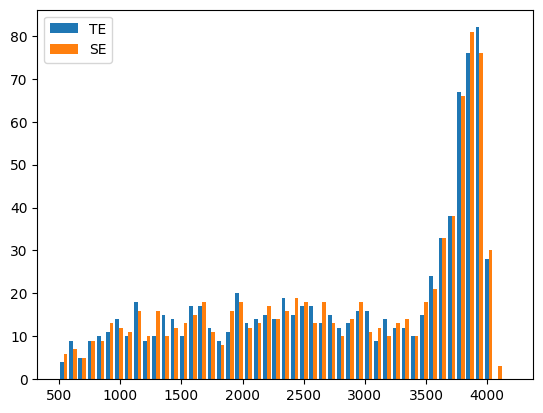

In [10]:
SE_tokens = []
for i in mm1s_tl[mm1s_tl['SE_presence']==1][mm1s_tl.tl>=500]['tl']:
  SE_tokens.append(i)
SE_tokens = np.array(SE_tokens)

TE_tokens = []
for i in mm1s_tl[mm1s_tl['SE_presence']==0][mm1s_tl.tl>=500]['tl']:
  TE_tokens.append(i)
TE_tokens = np.array(TE_tokens)

bins = np.linspace(500, 4200, 50)
plt.hist([TE_tokens, SE_tokens], bins, label=['TE', 'SE'])
plt.legend(loc='upper left')
plt.show()

In [11]:
mm1s_tl_SE = mm1s_tl_SE[mm1s_tl_SE.tl>=500]

In [12]:
np.max(mm1s_tl_SE.tl)

4098

In [13]:
TE_data = mm1s_tl[:0]

In [15]:
for i in range(500, 4100, 50):
  bin = len(mm1s_tl_SE[mm1s_tl_SE.tl > i-50][mm1s_tl_SE.tl <= i])
  TEs = mm1s_tl_TE[mm1s_tl_TE.tl > i-50][mm1s_tl_TE.tl <= i][:bin]
  TE_data = pd.concat([TE_data, TEs])

<ipython-input-15-7733e45a5b44>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bin = len(mm1s_tl_SE[mm1s_tl_SE.tl > i-50][mm1s_tl_SE.tl <= i])
<ipython-input-15-7733e45a5b44>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TEs = mm1s_tl_TE[mm1s_tl_TE.tl > i-50][mm1s_tl_TE.tl <= i][:bin]
<ipython-input-15-7733e45a5b44>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bin = len(mm1s_tl_SE[mm1s_tl_SE.tl > i-50][mm1s_tl_SE.tl <= i])
<ipython-input-15-7733e45a5b44>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TEs = mm1s_tl_TE[mm1s_tl_TE.tl > i-50][mm1s_tl_TE.tl <= i][:bin]
<ipython-input-15-7733e45a5b44>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bin = len(mm1s_tl_SE[mm1s_tl_SE.tl > i-50][mm1s_tl_SE.tl <= i])
<ipython-input-15-7733e45a5b44>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  

In [16]:
data_to_save = pd.concat([mm1s_tl_SE, TE_data])

In [17]:
data_to_save

,Unnamed: 0,sequence,SE_presence,tl
0,8,TGTTACCATTAGCAGAAGTTTATTTTTGCAATTCCTCTGGCCTTCT...,1,4006
1,30,TCTTTAAGCTCTTTAAACTCCAAGTCTCTTCTCTACATGTTCAACT...,1,3634
2,54,TACAAAAACACTCTATTTTCATATATACATATATATAGAGAGAGAG...,1,1894
3,83,AATCAGGGGTCACTGGTCCAGGCCAATCGGGGTCTACCTCCTGGAG...,1,3650
4,100,CAGAACACTATTTTGTGTTTGCAAATAACGTGCTAAAACGCCTTTC...,1,3966
...,...,...,...,...
1724,1827,TGGTAGAAGGGGCTAGCTAGCTCTCGGGGGCCTCTTTTATAGAGCA...,0,4015
1725,2046,GACAGATAAATACAAATCTGGGAAGCTCACACATAGATGTACTATC...,0,4038
1726,2065,AAGAGGGCAGACATACCCAAGGGACAGGCCTCCTCTAGGGACACCC...,0,4034
1727,2067,TTATCTGTAACACACAGGAATCACTCAATAAATATTGACTACTGTT...,0,4014


<ipython-input-18-a1d577796d8e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i in data_to_save[data_to_save['SE_presence']==1][data_to_save.tl>=500]['tl']:
<ipython-input-18-a1d577796d8e>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i in data_to_save[data_to_save['SE_presence']==0][data_to_save.tl>=500]['tl']:


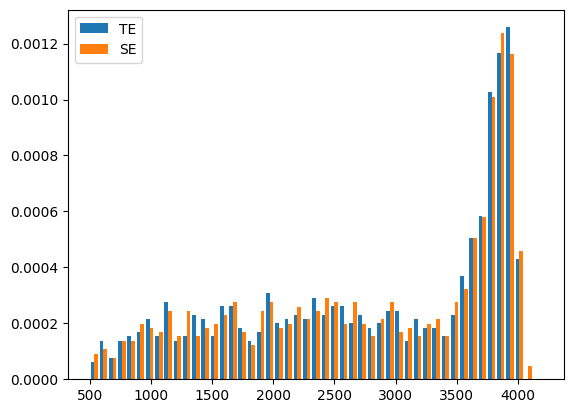

In [18]:
SE_tokens = []
for i in data_to_save[data_to_save['SE_presence']==1][data_to_save.tl>=500]['tl']:
  SE_tokens.append(i)
SE_tokens = np.array(SE_tokens)

TE_tokens = []
for i in data_to_save[data_to_save['SE_presence']==0][data_to_save.tl>=500]['tl']:
  TE_tokens.append(i)
TE_tokens = np.array(TE_tokens)

bins = np.linspace(500, 4200, 50)
plt.hist([TE_tokens, SE_tokens], bins, label=['TE', 'SE'], density = True)
plt.legend(loc='upper left')
plt.show()

In [ ]:
data_to_save.to_csv('/content/drive/MyDrive/neural_networks/data/MM1S/MM1S.csv')

##Integrative

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/SE_annotation_project/H2171/data/H2171.csv').sample(frac=1)[:800]
data2 = pd.read_csv('/content/drive/MyDrive/SE_annotation_project/HEK293/data/HEK293.csv').sample(frac=1)[:800]
data3 = pd.read_csv('/content/drive/MyDrive/neural_networks/data/HeLa/HeLa.csv').sample(frac=1)[:800]
data4 = pd.read_csv('/content/drive/MyDrive/neural_networks/data/MM1S/MM1S.csv').sample(frac=1)[:800]
data5 = pd.read_csv('/content/drive/MyDrive/SE_annotation_project/Jurkat/data/Jurkat.csv').sample(frac=1)[:800]
data6 = pd.read_csv('/content/drive/MyDrive/SE_annotation_project/K562/data/K562.csv').sample(frac=1)[:800]
data7 = pd.read_csv('/content/drive/MyDrive/SE_annotation_project/u87/data/u87.csv').sample(frac=1)[:800]

In [ ]:
data = pd.concat([data1, data2, data3, data4, data5, data6, data7]).sample(frac=1)

In [ ]:
data = data[:2500]

In [ ]:
data.to_csv('/content/drive/MyDrive/neural_networks/data/integrative/integrative.csv')

In [ ]:
integrative_tl = data.copy()
tokens = []
for i in integrative_tl['sequence']:
  tokens.append(len(tokenizer.tokenize(i)))
tokens = np.array(tokens)

trainintegrative
integrative_tl_SE = integrative_tl[integrative_tl.SE_presence == 1]
integrative_tl_TE = integrative_tl[integrative_tl.SE_presence == 0]

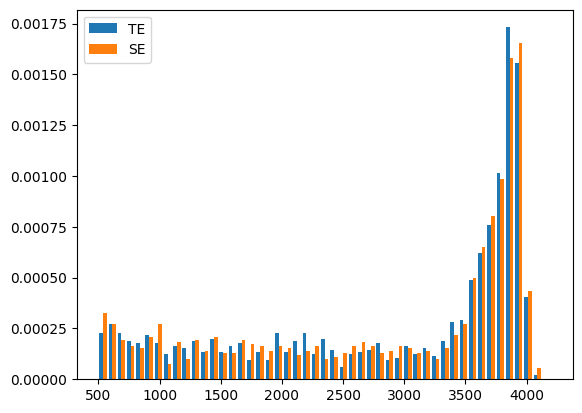

In [ ]:
SE_tokens = []
for i in integrative_tl_SE.tl:
  SE_tokens.append(i)
SE_tokens = np.array(SE_tokens)

TE_tokens = []
for i in integrative_tl_TE.tl:
  TE_tokens.append(i)
TE_tokens = np.array(TE_tokens)

bins = np.linspace(500, 4200, 50)
plt.hist([TE_tokens, SE_tokens], bins, label=['TE', 'SE'], density = True)
plt.legend(loc='upper left')
plt.show()